In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

<h2> Training and testing division</h2>

In [13]:
#Import dataset
dataset_name="IT_candidates.csv"
full_dataframe = pd.read_csv(dataset_name)
full_dataframe.drop(columns=full_dataframe.columns[0],inplace=True)

In [14]:
train_set, test_set = train_test_split(full_dataframe, test_size=0.2, random_state=42)

<h2> Training set labelling and encoding</h2> 
<h4> How we create a class for the metric?</h4>

In [28]:
train_set.iloc[:5,:13]

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed
51960,<35,No,Undergraduate,1.0,Man,No,Dev,20.0,14.0,Iraq,49332.0,36.0,True
66416,<35,No,Undergraduate,1.0,Man,No,NotDev,16.0,10.0,Spain,68679.0,15.0,True
62174,<35,No,Other,0.0,Man,No,Dev,8.0,6.0,Mexico,2409.0,15.0,True
42909,<35,No,Undergraduate,1.0,Man,No,Dev,10.0,6.0,Israel,179352.0,27.0,True
69112,<35,No,Master,1.0,Man,No,Dev,6.0,4.0,France,46923.0,28.0,True


<p>Description of the Categorical variables in the training dataset </p>

In [30]:
print(train_set.Age.value_counts())
print(train_set.Accessibility.value_counts())
print(train_set.EdLevel.value_counts())
print(train_set.Employment.value_counts())
print(train_set.Gender.value_counts())
print(train_set.MentalHealth.value_counts())
print(train_set.MainBranch.value_counts())
print(train_set.Employed.value_counts())
categorical = train_set.select_dtypes("object")

Age
<35    38318
>35    20350
Name: count, dtype: int64
Accessibility
No     57003
Yes     1665
Name: count, dtype: int64
EdLevel
Undergraduate    29924
Master           15078
Other             8639
NoHigherEd        2944
PhD               2083
Name: count, dtype: int64
Employment
1.0    51818
0.0     6850
Name: count, dtype: int64
Gender
Man          54767
Woman         2819
NonBinary     1082
Name: count, dtype: int64
MentalHealth
No     45466
Yes    13202
Name: count, dtype: int64
MainBranch
Dev       53769
NotDev     4899
Name: count, dtype: int64
Employed
True     31522
False    27146
Name: count, dtype: int64


<p>Description of the numerical variables in the training dataset </p>

array([[<Axes: title={'center': 'Employment'}>,
        <Axes: title={'center': 'YearsCode'}>],
       [<Axes: title={'center': 'YearsCodePro'}>,
        <Axes: title={'center': 'PreviousSalary'}>],
       [<Axes: title={'center': 'ComputerSkills'}>, <Axes: >]],
      dtype=object)

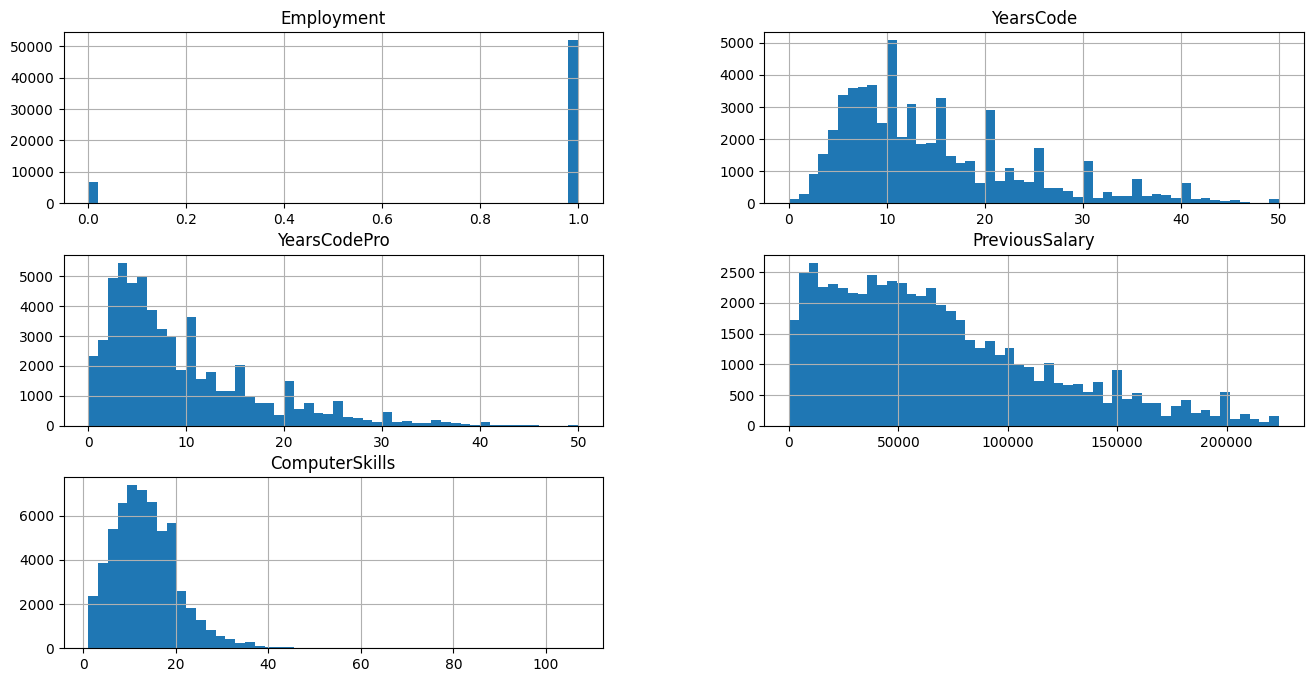

In [45]:
numerical = train_set.select_dtypes('number').iloc[:,:5]
skills = train_set.select_dtypes('number').iloc[:,5:]
numerical.hist(bins=50,figsize=(16,8))

In [86]:
mock = train_set[["Gender","PreviousSalary","YearsCodePro"]]
color_list = [0.2 if i == 'Man' else 1.0 for i in mock.Gender]

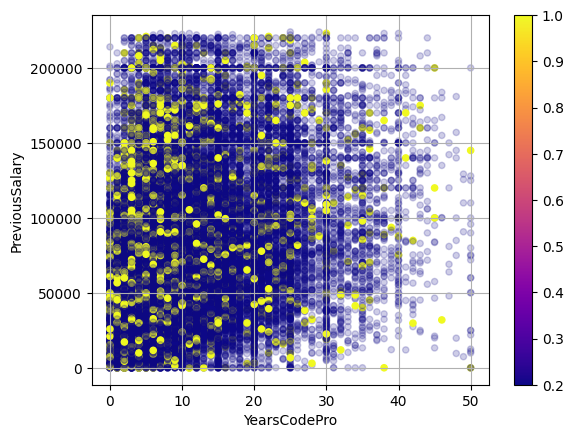

In [87]:
mock.plot(kind='scatter',x='YearsCodePro',y='PreviousSalary',grid=True,c=color_list,cmap='plasma',colorbar=True,alpha=color_list)
plt.show()

<h2> Job posting information </h2> 

In [42]:
#Import dataset
dataset_name="Cleaned_DS_Jobs.csv"
postings = pd.read_csv(dataset_name)

In [94]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Salary Estimate    660 non-null    object 
 2   Job Description    660 non-null    object 
 3   Rating             660 non-null    float64
 4   Company Name       660 non-null    object 
 5   Location           660 non-null    object 
 6   Headquarters       660 non-null    object 
 7   Size               660 non-null    object 
 8   Type of ownership  660 non-null    object 
 9   Industry           660 non-null    object 
 10  Sector             660 non-null    object 
 11  Revenue            660 non-null    object 
 12  min_salary         660 non-null    int64  
 13  max_salary         660 non-null    int64  
 14  avg_salary         660 non-null    int64  
 15  job_state          660 non-null    object 
 16  same_state         660 non

In [88]:
dataset_name = 'ds_salaries.csv'
salaries_data = pd.read_csv(dataset_name)
salaries_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [104]:
pd.options.display.float_format = '{:.0f}'.format
salaries_data.groupby('job_title')['salary'].mean().sort_values()

job_title
Finance Data Analyst                         45000
ETL Developer                                50000
Data Analytics Engineer                      61750
Marketing Data Analyst                       75000
Lead Machine Learning Engineer               80000
Computer Vision Engineer                     83500
Data Science Engineer                        84500
Data Analyst                                 96605
Machine Learning Infrastructure Engineer     97333
Machine Learning Developer                  100000
Computer Vision Software Engineer           100333
Staff Data Scientist                        105000
Research Scientist                          110494
Data Engineering Manager                    119800
Principal Data Analyst                      122500
Data Science Consultant                     122714
Big Data Architect                          125000
Data Analytics Manager                      127134
Cloud Data Engineer                         140000
Lead Data Engineer   